In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

[[169 130 139 145 139 176 151 168 161 148 133 132 146 141]
 [195 150 115 129 128 114 125 110 129 138 117 115 124 133]
 [183 140 201 178 179 178 149 155 123 140 127 136 142 147]
 [178 160 191 185 203 193 215 194 211 209 204 203 197 165]
 [180 149 146 148 163 137 140 100 164 155 176 161 176 157]
 [181 176 167 137 124 119 156 158 153 147 172 129 156 160]
 [166 165 175 151 168 185 169 141 149 141 162 126 154 158]
 [173 182 208 196 216 222 203 183 185 167 180 169 185 162]
 [174 155 199 176 196 173 164 191 187 187 180 196 201 159]
 [182 166 209 149 205 153 109 106 133 151 151 189 193 153]
 [156 171 225 128 175 148 137 108 140 175 153 208 184 167]
 [177 176 198 207 169 201 192 196 170 196 173 212 177 159]
 [152 174 203 186 213 189 189 191 209 205 205 196 192 155]
 [174 177 167 210 139  44 192 207  94  53  68 114 168 149]
 [143 197 214 150  60  53 180 191  79 123 149 172 156 164]
 [157 190 170  73 132  93 194 211  59  91 115 183 176 168]
 [160 179  59 129 227  76 201 200 152 110  90 117 178 16

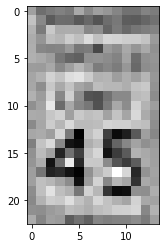

In [2]:
%%time
#input image, 0 indicate greyscale
img = cv2.imread('45.jpg',0)
print(img)
#get size
print(img.shape)
h_org,w_org = img.shape[0], img.shape[1] #cv2 order of size: height then width
print("original size =", w_org,h_org)
#show image
plt.imshow(img, cmap = 'gray')

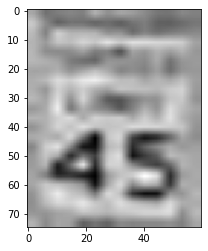

In [3]:
#resize image
img = cv2.resize(img, (60,75)) #resize but keep the ratio of the actual sign
#show image
plt.imshow(img, cmap = 'gray')

In [4]:
#another way to display image ---no need
def display_img(img):
    fig = plt.figure(figsize=(56,56))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

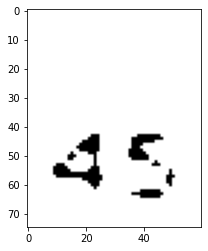

In [5]:
#convert to binary image (black-white only)
ret,thresh = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = 'gray')

1
0 0 60 75
Wall time: 15.6 ms


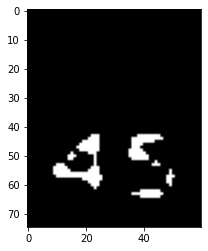

In [6]:
%%time
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
print(len(cnts))
for c, num in zip(cnts, range(len(cnts))):
    x,y,w,h = cv2.boundingRect(c) #coordinates of the bounding box: top_left_x, top_left_y, width, height 
    #print(c, num)
    print(x,y, w,h)
    ROI = 255 - thresh[y:y+h, x:x+w]
    cv2.imwrite('ROI1_{}.png'.format(num), ROI)
    if (w > 30 and h > 30):
        cv2.imwrite('ROI_sign.png', ROI)
        thresh = ROI
    

        #print("thresh",hresh)
plt.imshow(thresh, cmap = 'gray')

In [7]:
h_sign, w_sign = thresh.shape #w,h of the image of the extracted sign
print(h_sign,w_sign)

75 60


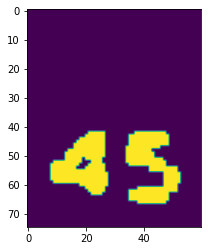

In [8]:
if (h_org < 20 or w_org < 20):
    kernel = np.ones((4,4), np.uint8)
    thresh = cv2.dilate(thresh, kernel, iterations=1)
    plt.imshow(thresh)

2
34 42 19 25
8 42 20 22
Wall time: 18.6 ms


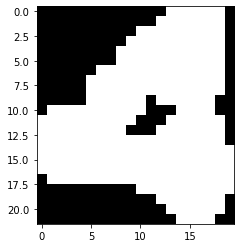

In [9]:
%%time
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
print(len(cnts))
count = 0
left_x = 60
for c, num in zip(cnts, range(len(cnts))):
    x,y,w,h = cv2.boundingRect(c) #coordinates of the bounding box: top_left_x, top_left_y, width, height
    print(x,y,w,h)
    ROI = thresh[y:y+h, x:x+w]
    cv2.imwrite('ROI2_{}.png'.format(num), ROI)
    if (w > 10 and h > 10 and h < 40 and w < 35 and w/h <2 and h/w < 2 and x!= 0 and y!= 0 and x+w != 60 and y+h != 75):
        cv2.imwrite('ROI_sign_number.png', ROI)
        plt.imshow(ROI, cmap = 'gray')
        count += 1
        if count == 1:
            left_number = ROI
            right_number = ROI
        if (x < left_x):
            left_number = ROI
            left_x = x
            cv2.imwrite('ROI_left_number.png', ROI)
        else:
            right_number = ROI
            cv2.imwrite('ROI_right_number.png', ROI)
            
        #print("thresh",hresh)
if count > 3: print("ERROR! MORE THAN 2 NUMBERS")


In [10]:
count

2

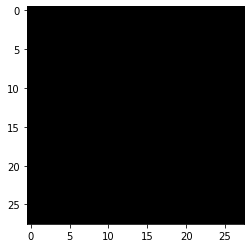

In [11]:
white_background = np.full([28,28], 0, dtype=np.uint8)
plt.imshow(white_background, cmap = 'gray')

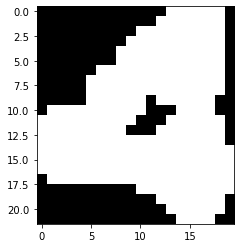

In [12]:
plt.imshow(left_number, cmap = 'gray')

In [13]:
left_number.shape

(22, 20)

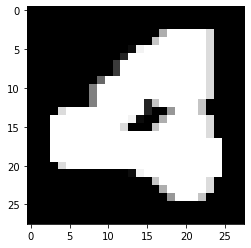

In [14]:
black_background = np.full([28,28], 0, dtype=np.uint8)
#scaled_left_number = black_background.paste(left_number, (3,3))
offset = 3
left_number = cv2.resize(left_number, (22,22))
black_background[ offset : offset+left_number.shape[0], offset : offset+left_number.shape[1]] = left_number
scaled_left_number = black_background
plt.imshow(scaled_left_number, cmap = 'gray')

In [15]:
print(scaled_left_number/255)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

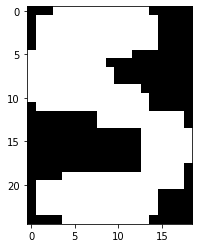

In [16]:
plt.imshow(right_number, cmap = 'gray')

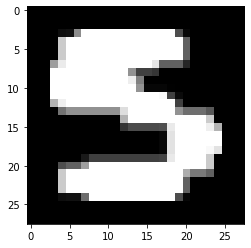

In [17]:
black_background = np.full([28,28], 0, dtype=np.uint8)
#scaled_left_number = black_background.paste(left_number, (3,3))
offset = 3
#right_number = cv2.resize(right_number, (22,22))
right_number = cv2.resize(right_number, (22,22))
#print(right_number/255)
black_background[ offset : offset+right_number.shape[0], offset : offset+right_number.shape[1]] = right_number
scaled_right_number = black_background
plt.imshow(scaled_right_number, cmap = 'gray')

In [18]:
print(scaled_right_number/255)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.05490196 0.06666667
  0.55294118 1.         1.         1.         1.         1.
  1.       